In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_json('data/feature_extracted.ndjson', lines=True)
df = df.fillna(0)
print(len(df))
df = df[df['white_cpl'].apply(lambda x: len(x) > 0)]
df = df[df['black_cpl'].apply(lambda x: len(x) > 0)]
print(len(df))

df = df.dropna()

print(len(df))

2400
2395
2395


In [5]:
df["ECO"] = df["ECO"].astype('category')
df["Opening"] = df["Opening"].astype('category')
df["result"] = df["result"].astype('category')

df["mean_elos"] = df[['white_elo', 'black_elo']].mean(axis=1)
df["diff_elos"] = df['white_elo'] - df['black_elo']

df['white_mean'] = df['white_cpl'].apply(np.mean)
df['white_std'] = df['white_cpl'].apply(np.std)
df['white_min'] = df['white_cpl'].apply(np.min)
df['white_max'] = df['white_cpl'].apply(np.max)

df['black_mean'] = df['black_cpl'].apply(np.mean)
df['black_std'] = df['black_cpl'].apply(np.std)
df['black_min'] = df['black_cpl'].apply(np.min)
df['black_max'] = df['black_cpl'].apply(np.max)

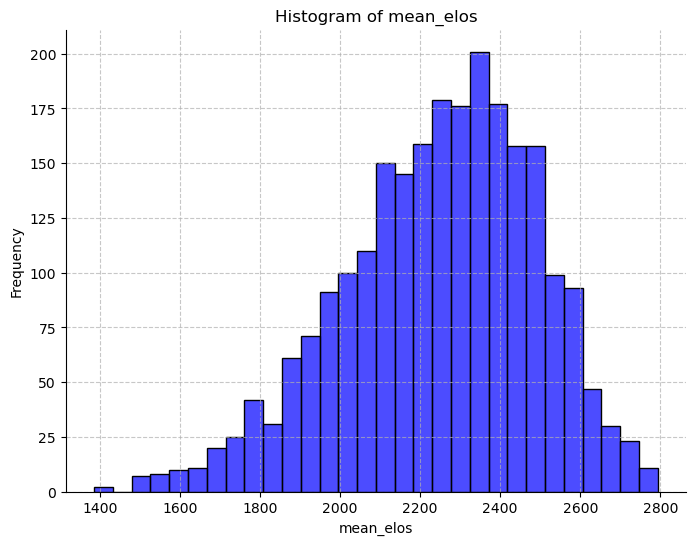

In [9]:
# Plotting the histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['mean_elos'].dropna(), bins=30, alpha = 0.7, kde=False, color='blue')

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Removing the spines (lines around the plot)
sns.despine()

# Adding labels and title
plt.title('Histogram of mean_elos')
plt.xlabel('mean_elos')
plt.ylabel('Frequency')

plt.show()

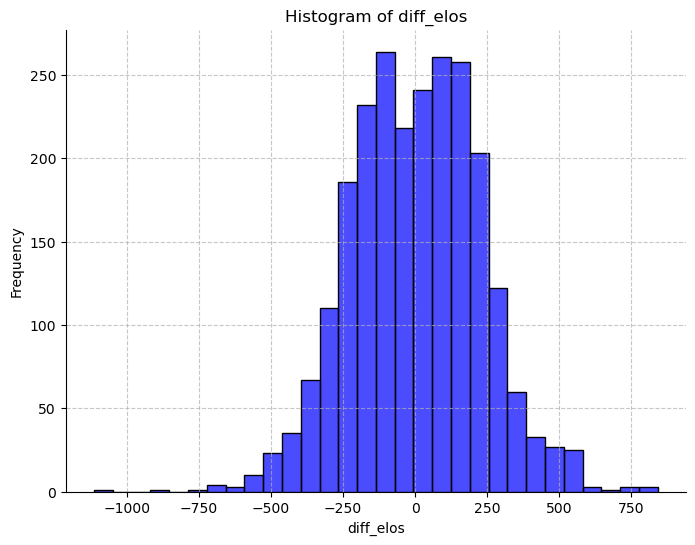

In [10]:
# Plotting the histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['diff_elos'].dropna(), bins=30, alpha = 0.7, kde=False, color='blue')

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Removing the spines (lines around the plot)
sns.despine()

# Adding labels and title
plt.title('Histogram of diff_elos')
plt.xlabel('diff_elos')
plt.ylabel('Frequency')

plt.show()

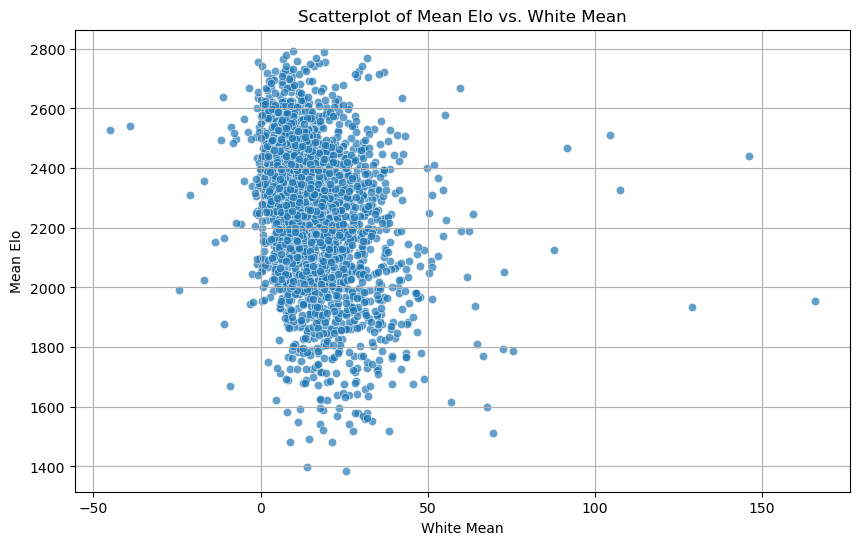

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and contains the necessary columns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='white_mean', y='mean_elos', data=df, alpha=0.7)
plt.title('Scatterplot of Mean Elo vs. White Mean')
plt.xlabel('White Mean')
plt.ylabel('Mean Elo')
plt.grid(True)
plt.show()

In [12]:
print(df["white_mean"])

0       13.250000
1       36.220000
2       23.222222
3        9.000000
4        4.884615
          ...    
2395    14.689655
2396    16.534884
2397    28.039216
2398    13.000000
2399    11.955556
Name: white_mean, Length: 2395, dtype: float64
